In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/merge_15min_filled.csv.tar.gz')
print(zip_path)
df = pd.read_csv(zip_path, compression='tar')

/Users/watcharinsarachai/.keras/datasets/merge_15min_filled.csv.tar.gz


In [4]:
df.head(3)

,datetime,ambient_temperature,current_power,current_value_of_consumption,external_energy_supply,grid_feed_in,internal_power_supply,self_consumption,temperature_measurement,total_irradiation,...,sp,sshf,ssr,ssrd,str,strd,t2m,tp,u10,v10
0,2021-11-06 11:15:00,30.288889,46519.355556,37280.422222,0.0,9238.933333,37280.422222,37280.422222,58.022222,798.444444,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
1,2021-11-06 11:30:00,30.076923,47600.714286,39472.626374,0.0,9397.756098,39132.406593,39132.406593,58.263736,812.571429,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2,2021-11-06 11:45:00,30.629213,47056.988764,32669.393258,0.0,14387.595506,32669.393258,32669.393258,57.235955,807.224719,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603


In [5]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")

In [6]:
df.pop('current_value_of_consumption')
df.pop('external_energy_supply')
df.pop('grid_feed_in')
df.pop('internal_power_supply')
df.pop('self_consumption')
df.head(2)

,datetime,ambient_temperature,current_power,temperature_measurement,total_irradiation,utci_mean,cc,q,r,t,...,sp,sshf,ssr,ssrd,str,strd,t2m,tp,u10,v10
0,2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,302.213731,0.0,0.011205,63.667006,293.487773,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
1,2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,302.213731,0.0,0.011205,63.667006,293.487773,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603


In [7]:
# Check what years exist in your dataset
date_col = 'datetime'  # Replace with your actual column name

df = df.sort_values(date_col).reset_index(drop=True)

# Ensure timestamp column is datetime type
if df[date_col].dtype != 'datetime64[ns]':
    df[date_col] = pd.to_datetime(df[date_col])

# Sort by time if it exists
df.index = df[date_col]
df.pop(date_col)
df = df.sort_index()
print(df.shape)

df.head(5)

(138238, 23)


,ambient_temperature,current_power,temperature_measurement,total_irradiation,utci_mean,cc,q,r,t,u,...,sp,sshf,ssr,ssrd,str,strd,t2m,tp,u10,v10
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 11:45:00,30.629213,47056.988764,57.235955,807.224719,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 12:00:00,31.021978,48415.835165,56.846154,817.527473,299.223424,0.0,0.011366,65.189689,293.320821,0.497185,...,96169.262638,-1.129156e+06,1.577950e+07,1.890126e+07,-4.231913e+06,1.548664e+07,297.380576,4.261732e-07,0.378476,0.374936
2021-11-06 12:15:00,31.831461,49345.404494,55.842697,816.651685,299.223424,0.0,0.011366,65.189689,293.320821,0.497185,...,96169.262638,-1.129156e+06,1.577950e+07,1.890126e+07,-4.231913e+06,1.548664e+07,297.380576,4.261732e-07,0.378476,0.374936


In [8]:
mapping = {
  'ambient_temperature': 'ambient_temperature',
  'current_power': 'current_power',
  'temperature_measurement': 'module_temperature',
  'total_irradiation': 'total_irradiation',
  'utci_mean': 'utci_mean',
  'cc': 'cloud_cover',
  'q': 'specific_humidity',
  'r': 'relative_humidity',
  't': 'air_temperature',
  'u': 'wind_u_component',
  'v': 'wind_v_component',
  'fal': 'forecast_accumulated_liquid',
  'slhf': 'surface_latent_heat_flux',
  'sp': 'surface_pressure',
  'sshf': 'sensible_heat_flux',
  'ssr': 'surface_solar_radiation',
  'ssrd': 'surface_solar_radiation_direct',
  'str': 'surface_thermal_radiation',
  'strd': 'surface_thermal_radiation_direct',
  't2m': 'two_m_temperature',
  'tp': 'total_precipitation',
  'u10': 'u10_wind',
  'v10': 'v10_wind',
}
df = df.rename(columns=mapping)
df.head(2)

,ambient_temperature,current_power,module_temperature,total_irradiation,utci_mean,cloud_cover,specific_humidity,relative_humidity,air_temperature,wind_u_component,...,surface_pressure,sensible_heat_flux,surface_solar_radiation,surface_solar_radiation_direct,surface_thermal_radiation,surface_thermal_radiation_direct,two_m_temperature,total_precipitation,u10_wind,v10_wind
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603
2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,302.213731,0.0,0.011205,63.667006,293.487773,0.555862,...,96116.322417,-1.159087e+06,1.577950e+07,1.890126e+07,-3.907932e+06,1.423682e+07,298.020567,4.261732e-07,0.695138,0.362603


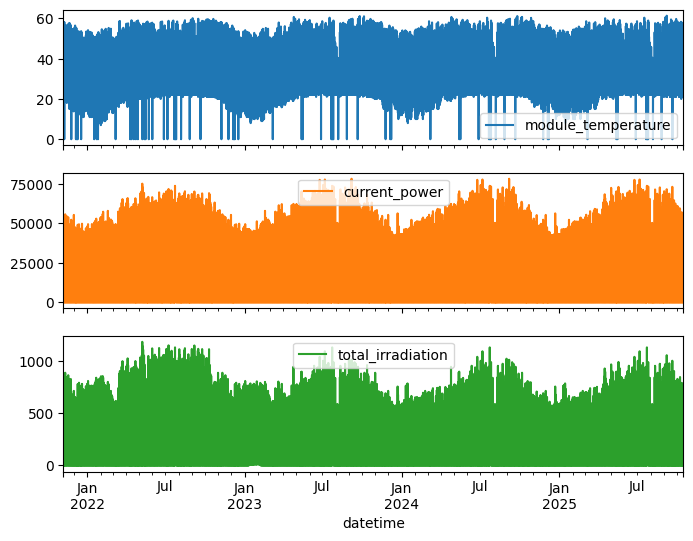

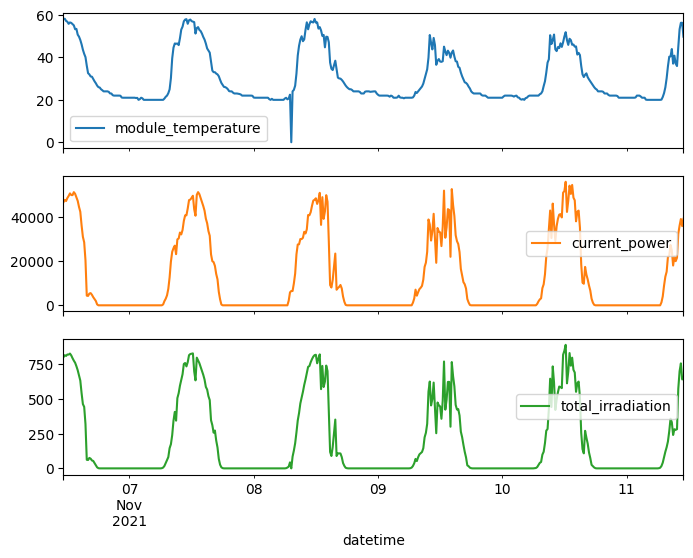

In [9]:
plot_cols = ['module_temperature', 'current_power', 'total_irradiation']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ambient_temperature,138238.0,2.583504e+01,5.150631e+00,0.000000e+00,2.310989e+01,2.600000e+01,2.913483e+01,4.001099e+01
current_power,138238.0,1.305281e+04,1.815287e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.526932e+04,7.825989e+04
module_temperature,138238.0,2.972648e+01,1.188849e+01,0.000000e+00,2.200000e+01,2.506593e+01,3.835227e+01,6.137363e+01
total_irradiation,138238.0,1.558014e+02,2.449202e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.658961e+02,1.183055e+03
utci_mean,138238.0,2.841147e+02,6.759370e+01,0.000000e+00,2.950198e+02,2.991934e+02,3.050845e+02,3.170079e+02
cloud_cover,138238.0,4.359805e-02,1.272938e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.337181e-02,1.000000e+00
specific_humidity,138238.0,1.155237e-02,3.095912e-03,0.000000e+00,9.139406e-03,1.240514e-02,1.411958e-02,1.746720e-02
relative_humidity,138238.0,7.105046e+01,1.935290e+01,0.000000e+00,5.918899e+01,7.650769e+01,8.576274e+01,1.018295e+02
air_temperature,138238.0,2.912035e+02,1.826893e+01,0.000000e+00,2.909458e+02,2.922866e+02,2.937318e+02,3.033400e+02
wind_u_component,138238.0,1.579913e+00,3.781639e+00,-1.205189e+01,-1.115728e+00,1.584174e+00,4.060733e+00,1.637189e+01


In [11]:
print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021, 2022, 2023, 2024, 2025], dtype='int32', name='datetime')
datetime
2024    35136
2022    35040
2023    35040
2025    27691
2021     5331
Name: count, dtype: int64


Text(0, 0.5, 'Forecast Accumulated Liquid')

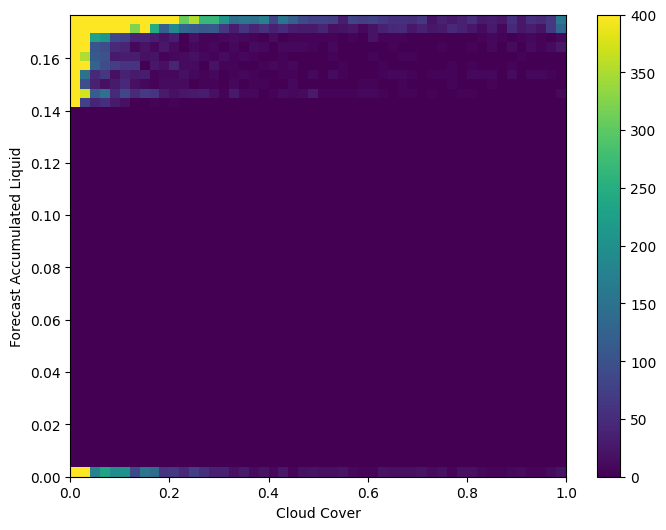

In [12]:
plt.hist2d(df['cloud_cover'], df['forecast_accumulated_liquid'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Cloud Cover')
plt.ylabel('Forecast Accumulated Liquid')

In [13]:
timestamp_s = df.index.map(pd.Timestamp.timestamp)
timestamp_s

Index([1636197300.0, 1636198200.0, 1636199100.0, 1636200000.0, 1636200900.0,
       1636201800.0, 1636202700.0, 1636203600.0, 1636204500.0, 1636205400.0,
       ...
       1760602500.0, 1760603400.0, 1760604300.0, 1760605200.0, 1760606100.0,
       1760607000.0, 1760607900.0, 1760608800.0, 1760609700.0, 1760610600.0],
      dtype='float64', name='datetime', length=138238)

In [14]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [15]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

[Text(0, 0, 'ambient_temperature'),
 Text(1, 0, 'current_power'),
 Text(2, 0, 'module_temperature'),
 Text(3, 0, 'total_irradiation'),
 Text(4, 0, 'utci_mean'),
 Text(5, 0, 'cloud_cover'),
 Text(6, 0, 'specific_humidity'),
 Text(7, 0, 'relative_humidity'),
 Text(8, 0, 'air_temperature'),
 Text(9, 0, 'wind_u_component'),
 Text(10, 0, 'wind_v_component'),
 Text(11, 0, 'forecast_accumulated_liquid'),
 Text(12, 0, 'surface_latent_heat_flux'),
 Text(13, 0, 'surface_pressure'),
 Text(14, 0, 'sensible_heat_flux'),
 Text(15, 0, 'surface_solar_radiation'),
 Text(16, 0, 'surface_solar_radiation_direct'),
 Text(17, 0, 'surface_thermal_radiation'),
 Text(18, 0, 'surface_thermal_radiation_direct'),
 Text(19, 0, 'two_m_temperature'),
 Text(20, 0, 'total_precipitation'),
 Text(21, 0, 'u10_wind'),
 Text(22, 0, 'v10_wind')]

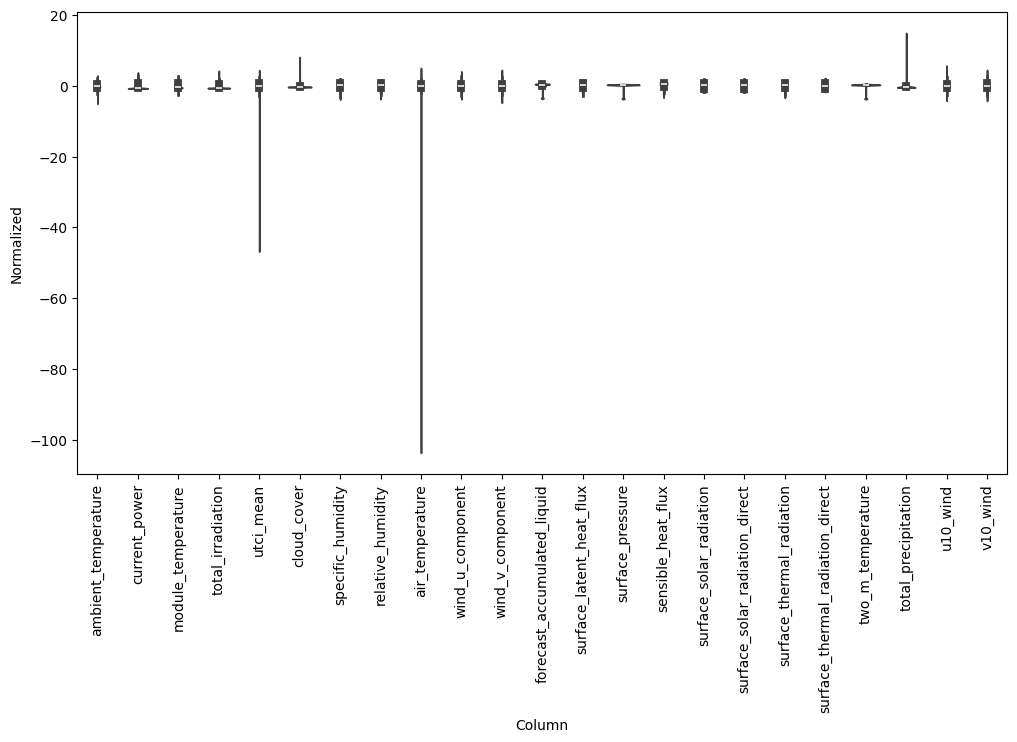

In [16]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticks(range(len(df.keys())))
ax.set_xticklabels(df.keys(), rotation=90)

In [17]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='current_power', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds
    
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result
  
  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [18]:
#WindowGenerator.train = train
# WindowGenerator.val = val
# WindowGenerator.test = test
# WindowGenerator.example = example

In [19]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['current_power'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['current_power']

In [20]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['current_power'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['current_power']

In [21]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 23)
Inputs shape: (3, 6, 23)
Labels shape: (3, 1, 1)


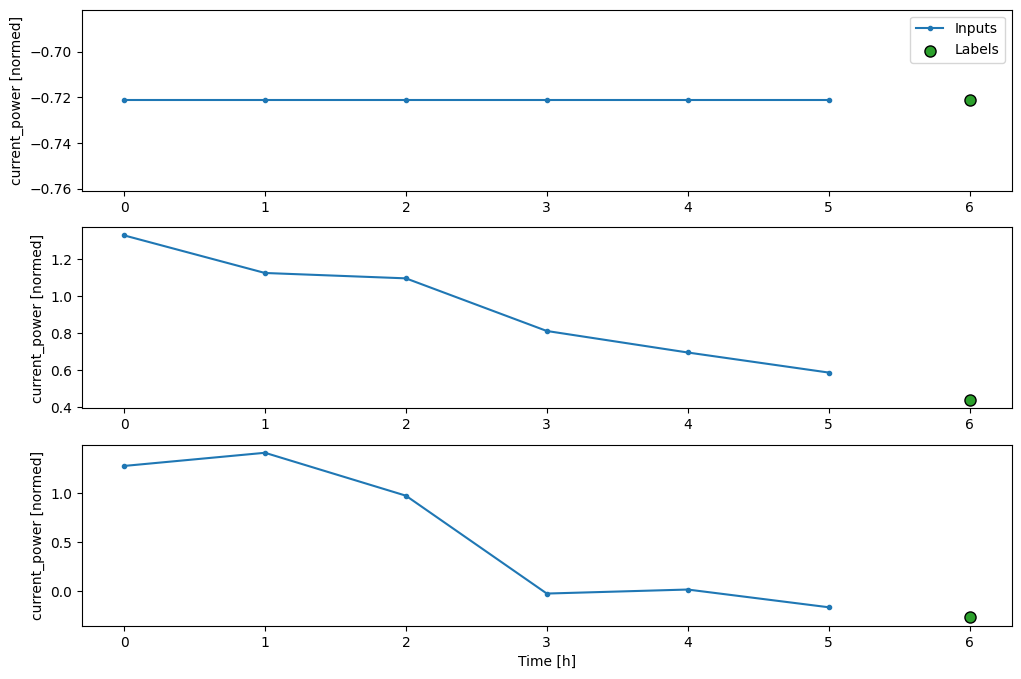

In [22]:
w2.plot()

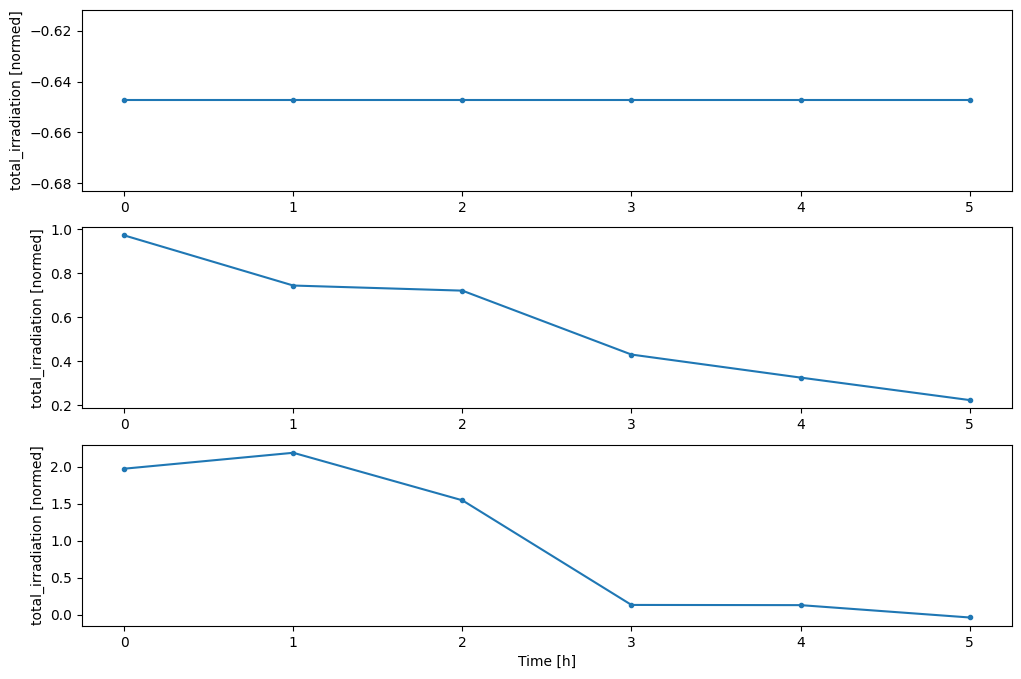

In [23]:
w2.plot(plot_col='total_irradiation')

In [24]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 23), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [25]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 23)
Labels shape (batch, time, features): (32, 1, 1)


2025-12-04 16:58:49.261653: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [26]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['current_power'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['current_power']

In [27]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 23)
Labels shape (batch, time, features): (32, 1, 1)


2025-12-04 16:58:54.427754: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [28]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [29]:
baseline = Baseline(label_index=column_indices['current_power'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

864/864 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - loss: 0.0508 - mean_absolute_error: 0.0989


In [30]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['current_power'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['current_power']

In [31]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 23)
Output shape: (32, 24, 1)


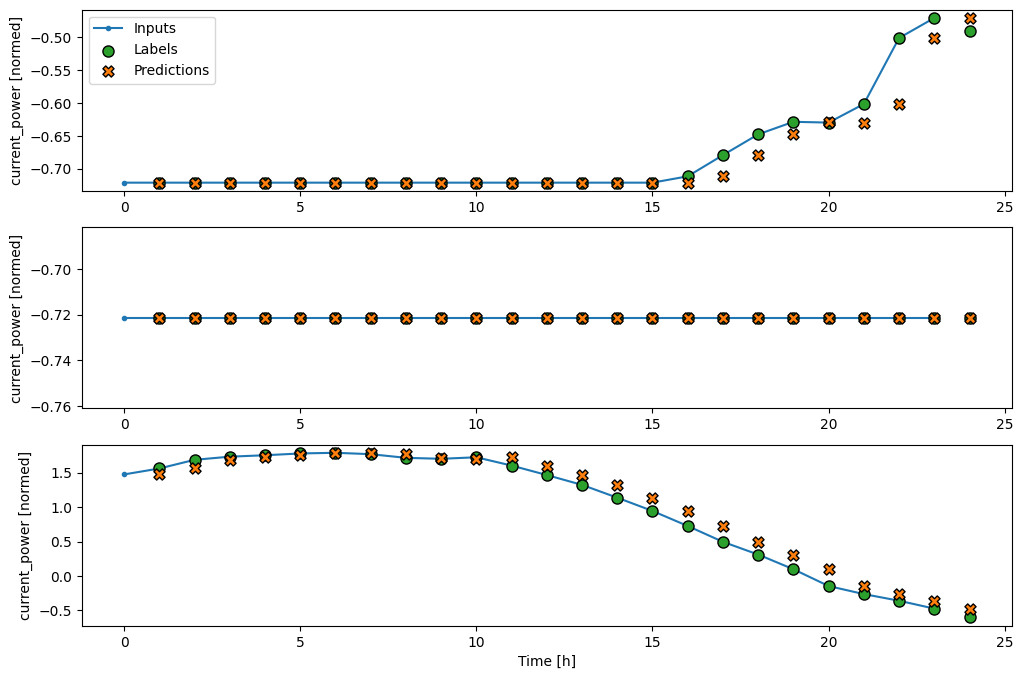

In [32]:
wide_window.plot(baseline)

In [33]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [34]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 23)
Output shape: (32, 1, 1)


In [35]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [36]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1444 - mean_absolute_error: 0.2186 - val_loss: 0.0470 - val_mean_absolute_error: 0.1126
Epoch 2/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0526 - mean_absolute_error: 0.1153 - val_loss: 0.0449 - val_mean_absolute_error: 0.1025
Epoch 3/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0517 - mean_absolute_error: 0.1112 - val_loss: 0.0444 - val_mean_absolute_error: 0.1032
Epoch 4/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0516 - mean_absolute_error: 0.1104 - val_loss: 0.0444 - val_mean_absolute_error: 0.1006
Epoch 5/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0515 - mean_absolute_error: 0.1102 - val_loss: 0.0444 - val_mean_absolute_error: 0.1003
864/864 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - loss: 0.0444 - mean_absolute_error: 0.1003


In [37]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 23)
Output shape: (32, 24, 1)


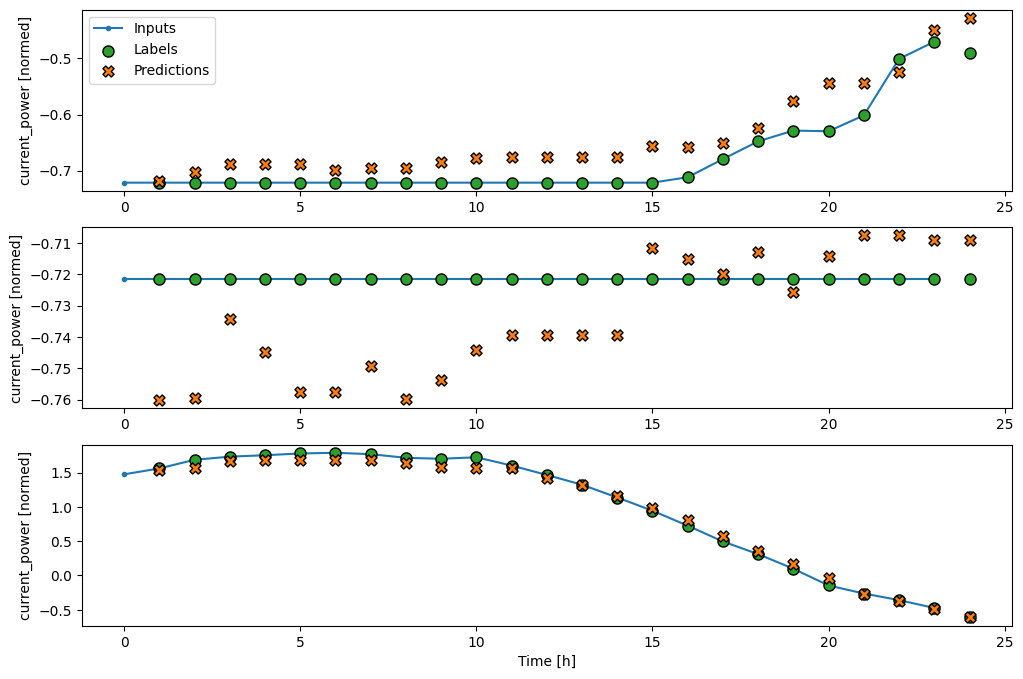

In [38]:
wide_window.plot(linear)

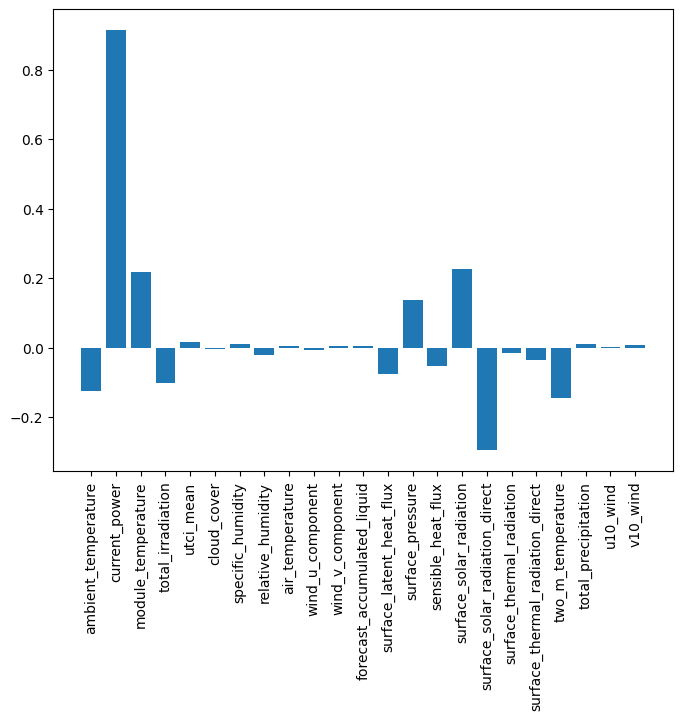

In [39]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [40]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0588 - mean_absolute_error: 0.1301 - val_loss: 0.0453 - val_mean_absolute_error: 0.1109
Epoch 2/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0489 - mean_absolute_error: 0.1087 - val_loss: 0.0424 - val_mean_absolute_error: 0.0998
Epoch 3/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0476 - mean_absolute_error: 0.1037 - val_loss: 0.0424 - val_mean_absolute_error: 0.0977
Epoch 4/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0468 - mean_absolute_error: 0.1003 - val_loss: 0.0404 - val_mean_absolute_error: 0.0887
Epoch 5/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0466 - mean_absolute_error: 0.0989 - val_loss: 0.0408 - val_mean_absolute_error: 0.0925
Epoch 6/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0461 - mean_absolute_error: 0.0978 - val_loss: 0.0410 - val_mean_absolute_error: 0.0970
864/864 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - loss: 0.0410 - mean_absolute_error: 0.0970


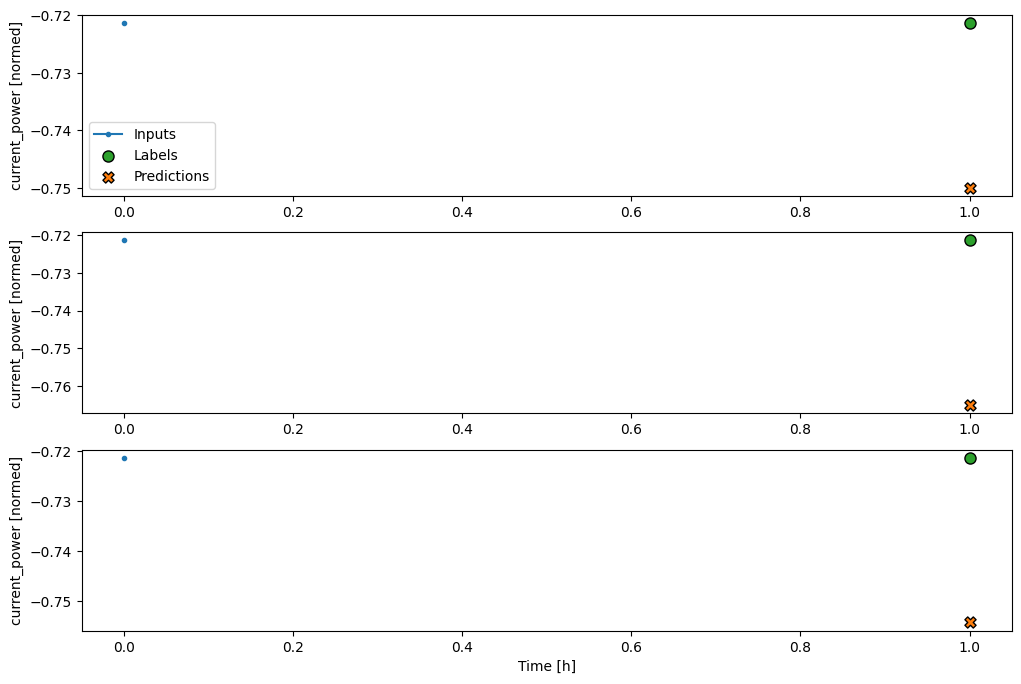

In [42]:
single_step_window.plot(dense)

In [43]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['current_power'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['current_power']

Text(0.5, 0.98, 'Given 3 hours of inputs, predict 1 hour into the future.')

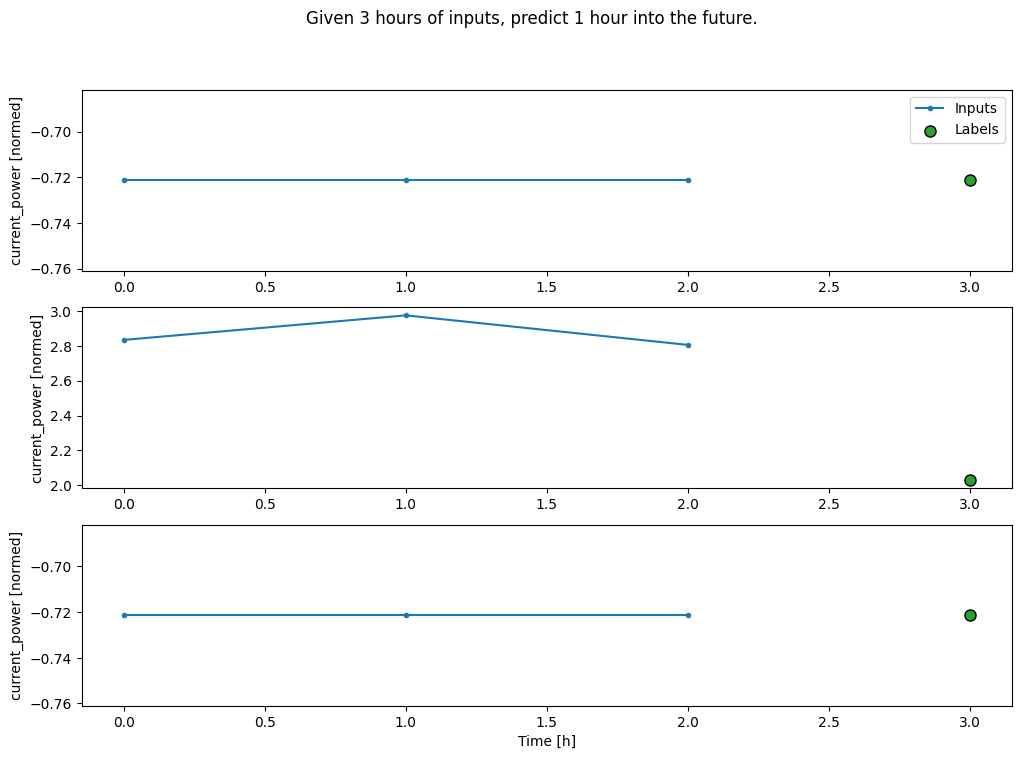

In [44]:
conv_window.plot()
plt.suptitle("Given 3 hours of inputs, predict 1 hour into the future.")

In [45]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [46]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [47]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

864/864 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - loss: 0.0396 - mean_absolute_error: 0.0889


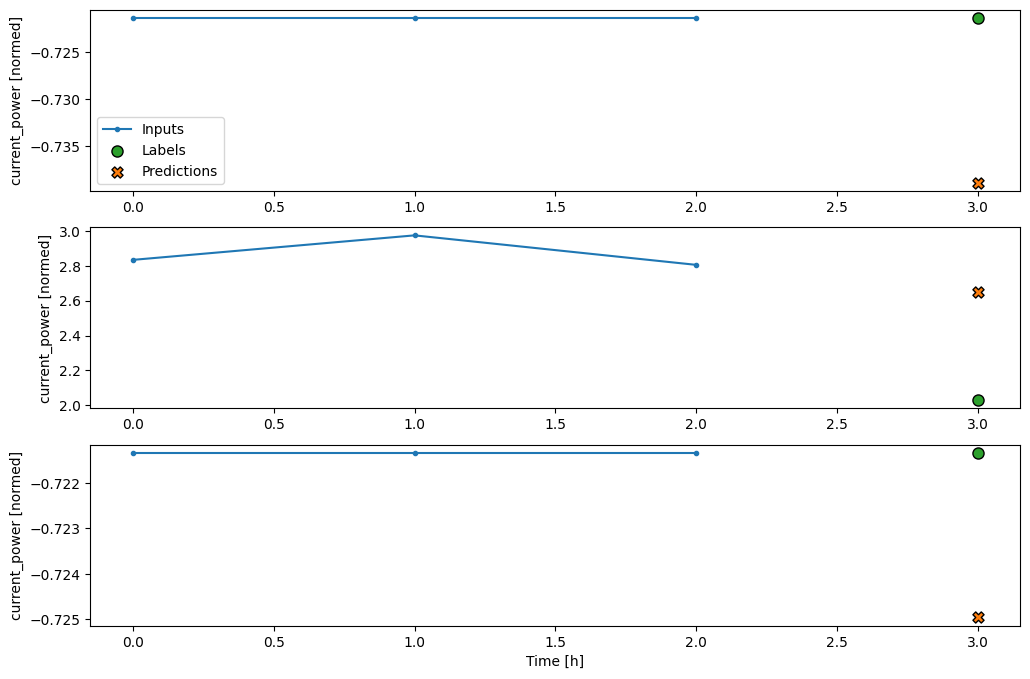

In [48]:
conv_window.plot(multi_step_dense)

In [49]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 23)

ValueError:Exception encountered when calling Sequential.call().

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 69, but received input with shape (32, 552)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 24, 23), dtype=float32)
  • training=None
  • mask=None
  • kwargs=<class 'inspect._empty'>


In [50]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [51]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [52]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

864/864 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - loss: 0.0413 - mean_absolute_error: 0.0945


In [53]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 23)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [54]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['current_power'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['current_power']

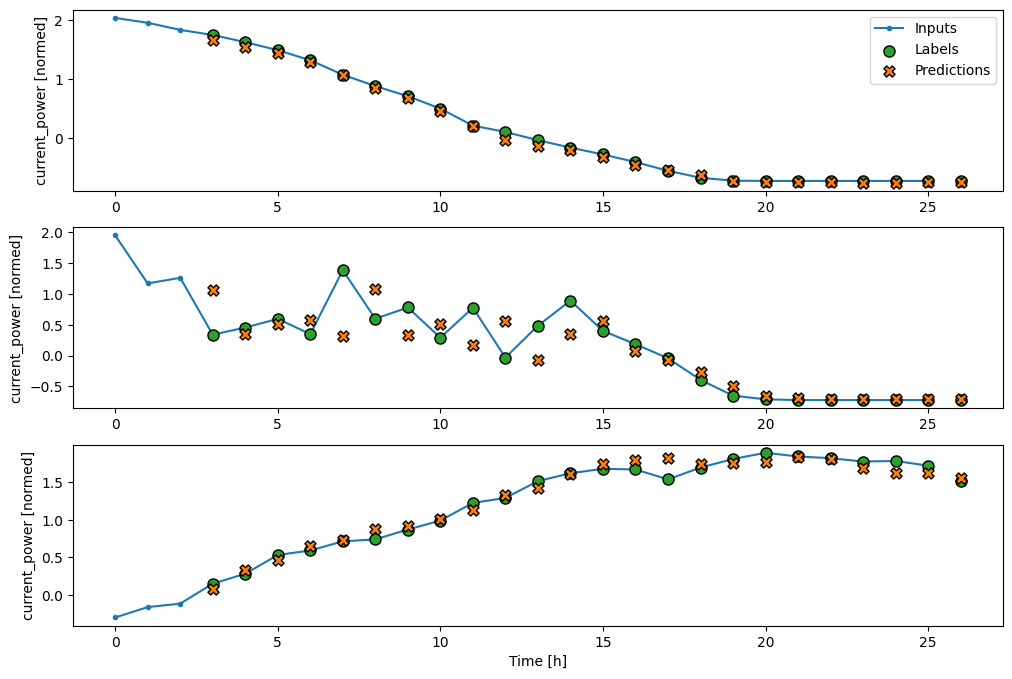

In [55]:
wide_conv_window.plot(conv_model)

In [56]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [57]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 23)
Output shape: (32, 24, 1)


In [58]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

864/864 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0387 - mean_absolute_error: 0.0847


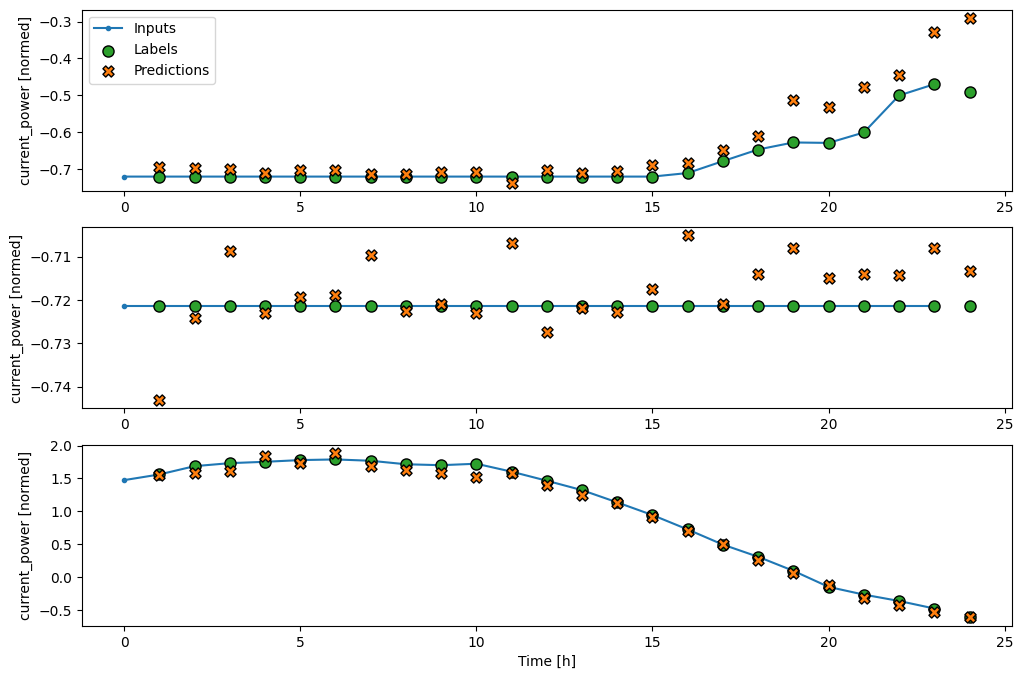

In [59]:
wide_window.plot(lstm_model)

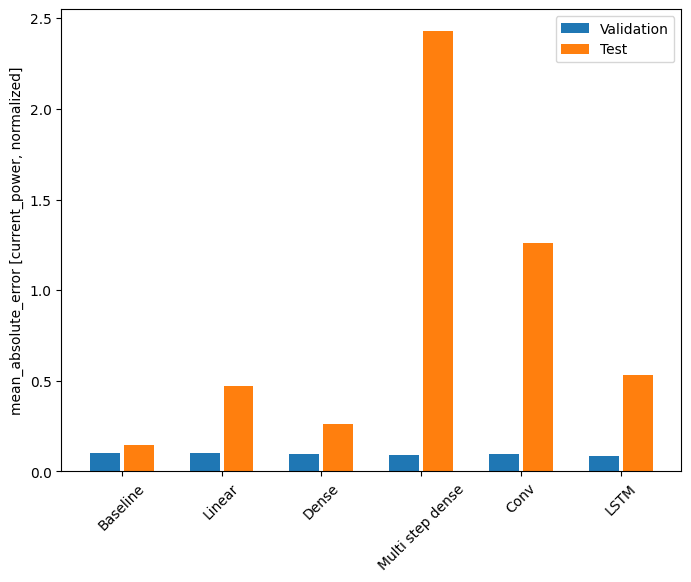

In [61]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [current_power, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [62]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 0.1439
Linear      : 0.4714
Dense       : 0.2639
Multi step dense: 2.4274
Conv        : 1.2617
LSTM        : 0.5315


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

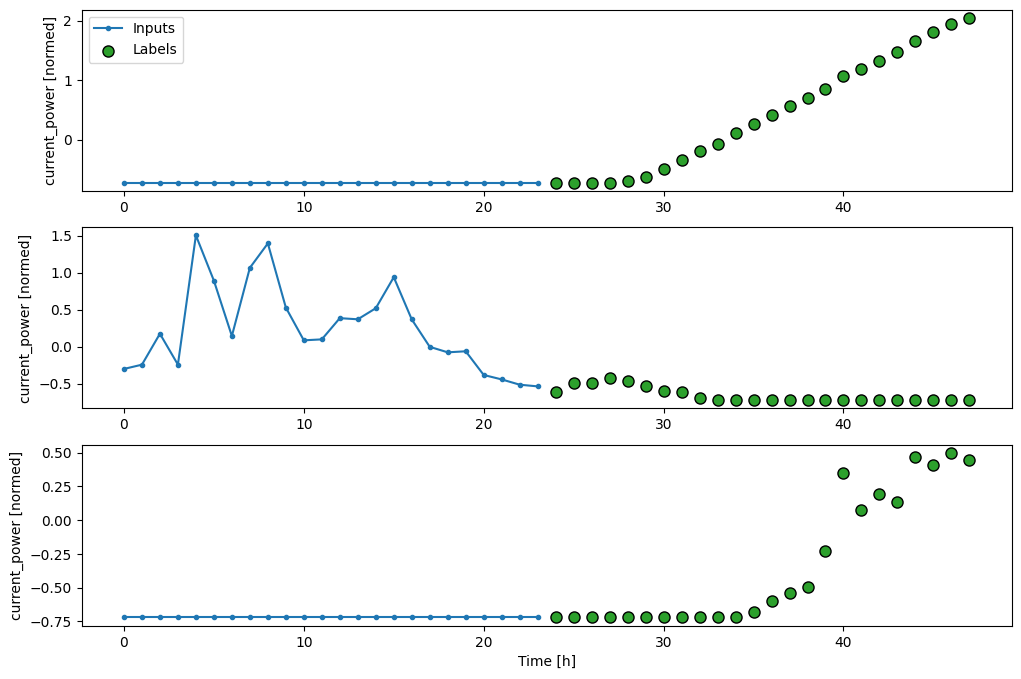

In [63]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.5332 - mean_absolute_error: 0.3775


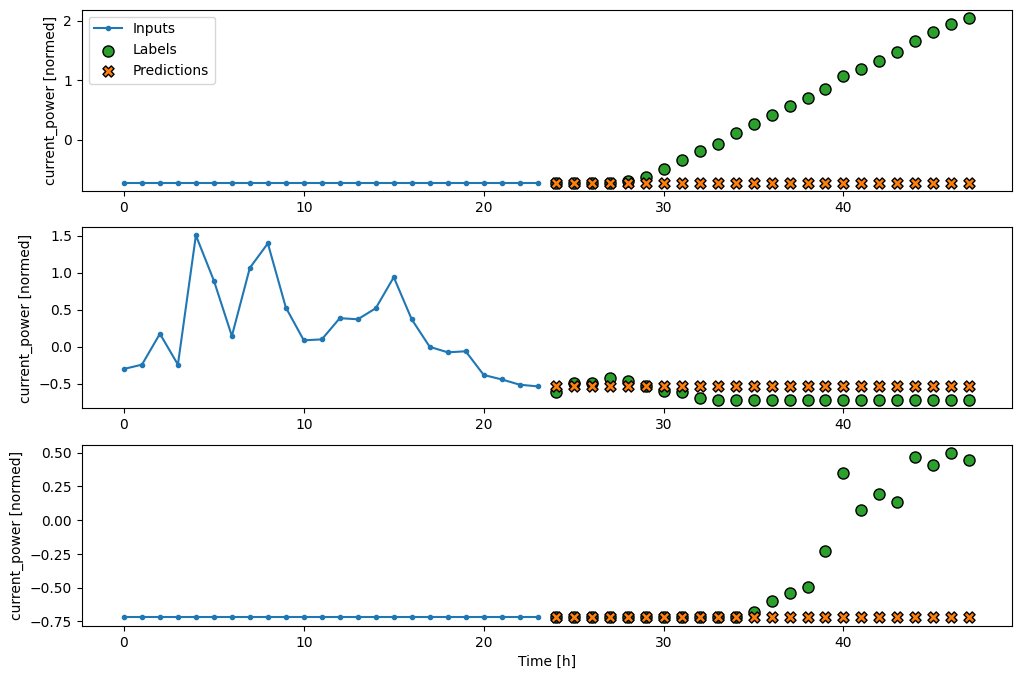

In [64]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)

863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1216 - mean_absolute_error: 0.1878


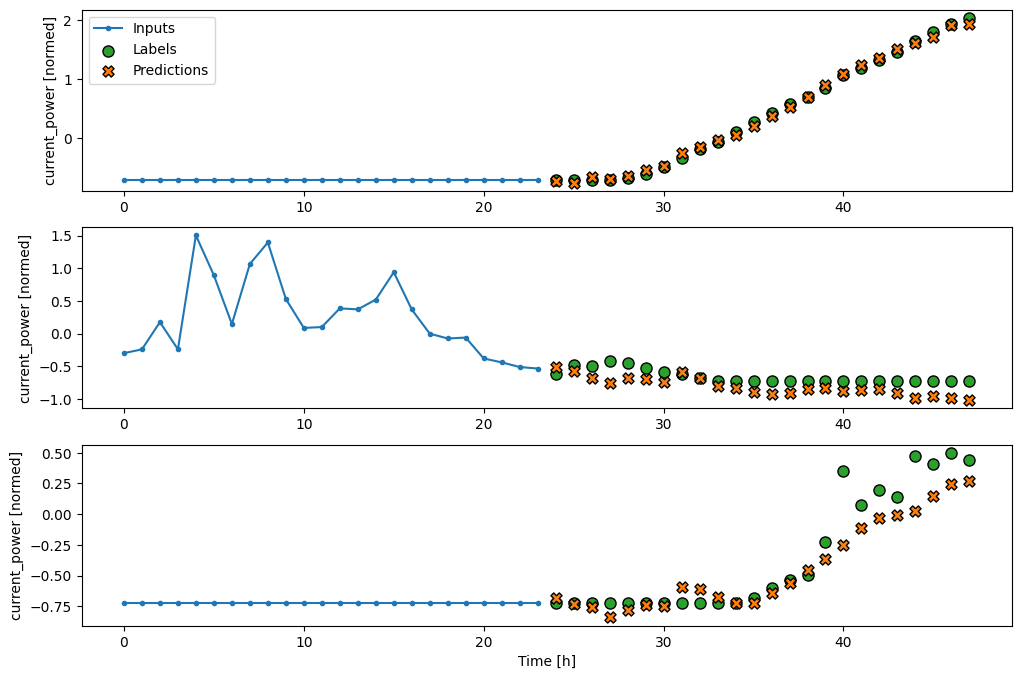

In [65]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)

863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1187 - mean_absolute_error: 0.1859


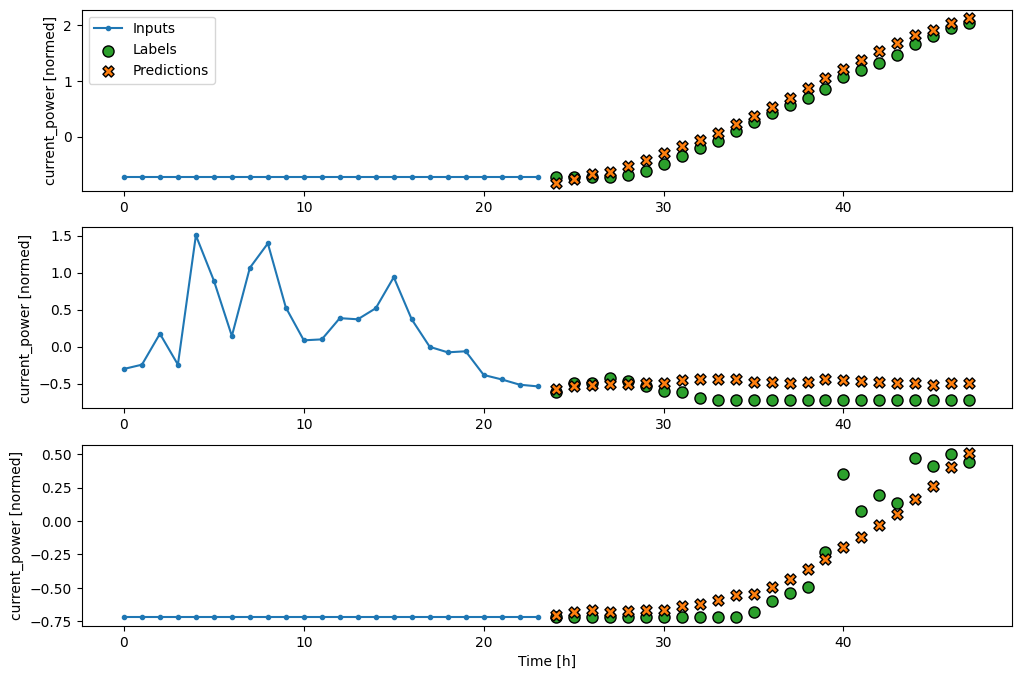

In [66]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)